In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import FortranFile
from matplotlib import animation, rc
from IPython.display import HTML

In [44]:
f = FortranFile('data/test0733.out', 'r')

In [45]:
h=(f.read_reals(float).reshape((151,151),order="F"))
f.close()

In [46]:
print(np.shape(h))
print(h[:,75])

(151, 151)
[5001.70601127 5001.70402096 5001.70203644 5001.70006351 5001.6981054
 5001.69616543 5001.69424607 5001.69234922 5001.69047561 5001.68862562
 5001.6867984  5001.6849934  5001.68320876 5001.68144392 5001.67969679
 5001.67796761 5001.6762547  5001.67455961 5001.67288138 5001.67122297
 5001.66958426 5001.66796921 5001.66637845 5001.66481628 5001.66328383
 5001.66178495 5001.66032095 5001.65889447 5001.65750671 5001.6561586
 5001.65485094 5001.65358283 5001.6523546  5001.65116376 5001.65001018
 5001.64889042 5001.64780407 5001.6467475  5001.64572022 5001.64471916
 5001.64374389 5001.64279243 5001.64186447 5001.64095929 5001.64007666
 5001.63921698 5001.63838003 5001.63756693 5001.63677749 5001.63601306
 5001.63527349 5001.63456001 5001.63387255 5001.63321199 5001.63257837
 5001.63197219 5001.63139356 5001.63084265 5001.63031962 5001.62982439
 5001.62935712 5001.62891759 5001.62850591 5001.62812177 5001.62776524
 5001.62743596 5001.62713393 5001.62685878 5001.62661045 5001.626388

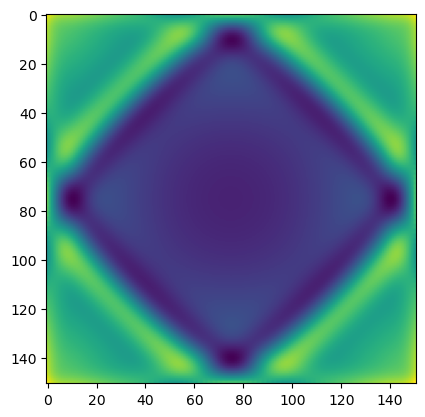

In [36]:
fig, ax = plt.subplots()
ax.imshow(h)

In [40]:
nt=733
hset = np.zeros((nt+1, 151, 151))
for ii in range(1,nt+1):
    if ii<10:
        nums='000'+str(ii)
    elif ii<100:
        nums='00'+str(ii)        
    elif ii<1000:
        nums='0'+str(ii)    
    filename='data/test'+nums+'.out'
    print(ii)
    f = FortranFile(filename, 'r')
    h=(f.read_reals(float).reshape((151,151),order="F"))
    f.close()
    hset[ii]=h


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [16]:
print(filename)

data/test0733.out


733 1


/home/mike/anaconda3/lib/python3.9/site-packages/matplotlib/animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


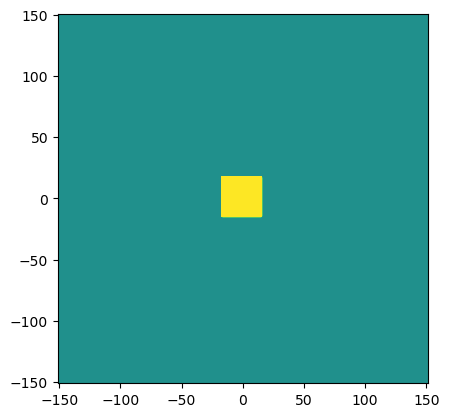

In [53]:
fig, ax = plt.subplots()
ii=1
Nvar=733
L=151

print(Nvar,ii)


#im = ax.imshow(rhop[100], animated=True, vmin=1e-2, vmax=10, extent=[-L, L, -L, L])
im = ax.imshow(hset[ii][:][:], animated=True, vmin=4999.75, vmax=5000.25, extent=[-L, L, -L, L])
def updatefig(*args):
    global ii
    ii += 1
    if ii >= Nvar: return im,
    im.set_array(hset[ii][:][:])
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=100, frames=733)

In [54]:
HTML(ani.to_html5_video())